# Question 1

<class 'tuple'>


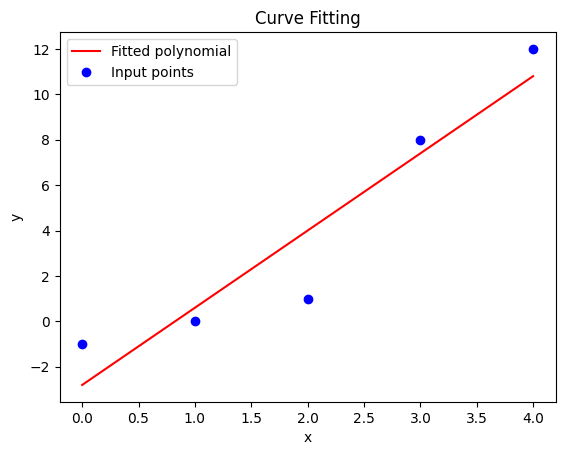

In [ ]:
#midsem code testing
import matplotlib.pyplot as plt
import numpy as np

class Polynomial():
    def __init__(self, coeff):   #initialising with the coefficient list of the polynomial
        self.vec = coeff

    def __str__(self):        #this will change the format of printing
        out_str = "The following is the polynomial\n"
        for i in range(len(self.vec)):
            out_str += f"{self.vec[i]}"
            if i!=0:
                out_str += f"x^{i} "
            else:
                out_str += " "
            if i!=len(self.vec)-1:
                out_str += "+ "
        return out_str

    def __len__(self):    #used to find the degree of the polynomial
        return len(self.vec)

    def __add__(self, other):    #overloading the + operator
        if(len(self)>len(other)):  #this makes sure that other polynomial always has higher degree
            return other.__add__(self)
        new_p = Polynomial([0]*len(other)) #making a new polynomial for the answer

        for i in range(len(self.vec)):   #adding the coefficients corresponding to the degree
            new_p.vec[i] += self.vec[i]
        for i in range(len(other.vec)):
            new_p.vec[i] += other.vec[i]
        return new_p    #returning the final polynomial

    def __mul__(self, other):  #overloading the * operator
        if isinstance(other, int)==True:   #if integer is multiplied
            new_vec = []
            for ele in self.vec:    #making a copy vector and multiplying the coefficients
                new_vec.append(ele*other)
            return Polynomial(new_vec)
        else:   #if other polynomial is multiplied
            new_p = Polynomial([0]*(len(self)+len(other)-1))   #making a copy polynomial to return the answer
            for i in range(len(self.vec)):
                for j in range(len(other.vec)):
                    new_p.vec[i+j] += self.vec[i]*other.vec[j]    #multiplying the coefficients and assigning it to the corresponding degree
            return new_p

    def __rmul__(self, other):    #copying the same but as rmul to enable multiplication of integers from left side
        if isinstance(other, int)==True:
            new_vec = []
            for ele in self.vec:
                new_vec.append(ele*other)
            return Polynomial(new_vec)
        else:
            new_p = Polynomial([0]*(len(self)+len(other)-1))
            for i in range(len(self.vec)):
                for j in range(len(other.vec)):
                    new_p.vec[i+j] += self.vec[i]*other.vec[j]
            return new_p

    def __sub__(self, other):   #subtraction is same as adding with multiplying -1
        return self.__add__(other*(-1))

    def __getitem__(self, val):   #this gets the value of the polynomial at the given point
        ans = 0
        for i in range(len(self.vec)):
            ans += (val**i)*self.vec[i]
        return ans

    def derivative(self):
        d = []
        for i in range(1, len(self.vec)):
            d.append(self.vec[i]*i)

        return Polynomial(d)

    def integrate(self):
        integral = [0]
        for i in range(0, len(self.vec)):
            integral.append(self.vec[i]/(i+1))

        return Polynomial(integral)

    def area(self, a, b):
      integral = self.integrate()
      area = integral[b] - integral[a]
      return area

    def visualize(self, a, b):   #plotting the values between a given range
        x = np.linspace(a, b, 1000)
        y = []
        for xe in x:
            y.append(self[xe])
        plt.plot(x, y, color='r')
        plt.ylabel("Value of the polynomial")
        plt.title("Polynomial Visualizer")
        plt.show()

    def fitViaLagrangePoly(self, pts):
      final_poly = Polynomial([0])  # Initialize the final polynomial
      for j in range(len(pts)):
          pt = pts[j]
          phi_poly = Polynomial([1])  # Initialize the phi polynomial for each point
          for i in range(len(pts)):
              if i == j:
                  continue
              pti = pts[i]
              if pt[0] == pti[0]:  # Skip points with identical x-coordinates to avoid division by zero
                  continue
              curr_p = Polynomial([-pti[0] / (pt[0] - pti[0]), 1 / (pt[0] - pti[0])])  # Calculate the ith phi polynomial
              phi_poly *= curr_p  # Multiply the phi polynomial with the current term
          final_poly += phi_poly * pt[1]  # Add y_i * phi_i to the final polynomial

    # Plotting the resulting polynomial
      x_val = [pt[0] for pt in pts]  # Extract x values from points
      y_val = [pt[1] for pt in pts]  # Extract y values from points
      a = min(x_val) - 1
      b = max(x_val) + 1
      x = np.linspace(a, b, 1000)  # Generate points for plotting
      y = [final_poly[xe] for xe in x]  # Calculate y values using the final polynomial

      plt.plot(x, y, color='r', label="Fitted polynomial")  # Plot the fitted polynomial
      plt.plot(x_val, y_val, 'o', color='b', label="Input points")  # Plot the input points
      plt.title("Lagrange Polynomial Fitting")
      plt.xlabel("x")
      plt.ylabel("y")
      plt.legend()
      plt.show()



def func(a_list, x, y):
  temp = 0
  for i in range(len(a_list)):
    temp += a_list[i]*(x**i)
  return (y-temp)**2
def func_value(pts, a0):
  val = 0
  for i in range(len(pts)):
    t_val = 0
    for j in range(len(a0)):
      t_val += a0[j]*(pts[i][0]**j)
    t_val *= -1
    t_val += pts[i][1]
    val += t_val**2
  return val
def grad(pts, a0):
  grad_list = []
  for k in range(len(a0)):
    ans = 0
    for i in range(len(pts)):
      temp = 0
      for j in range(len(a0)):
        temp += a0[i]*(pts[i][0]**j)
      ans += -1*2*(pts[i][1]-temp)*(pts[i][1]**k)
    grad_list.append(ans)
  return grad_list

import numpy as np

def argmax(pts, a0):
  # Compute the gradient of f.
  gradi = grad(pts, a0)

  # Find the direction of steepest ascent.
  direction = gradi / np.linalg.norm(gradi)
  for ele in direction:
    ele *= -1

  a1 = a0 + 0.01*direction

  for i in range(10000):
    a0 = a1
    a1 = a0 + direction

  return a0

# Example usage:

np.linalg.norm([3, 4])
argmax([(0, 0), (0, 0)], [1,1])
def best_fit(pts, n):
  m = len(pts)
  print(type(pts[0]))
  x = [pt[0] for pt in pts]
  y = [pt[1] for pt in pts]

  b = []

  for j in range(0, n + 1):
      currSum = 0
      for i in range(m):
          currSum += y[i] * (x[i] ** j)
      b.append(currSum)

  S = []
  for j in range(0, n + 1):
      currRow = []
      for k in range(0, n + 1):
          currSum = 0
          for i in range(m):
              currSum += x[i] ** (j + k)
          currRow.append(currSum)
      S.append(currRow)

  final_poly = Polynomial(list(np.linalg.solve(S, b)))

  x_val = [pt[0] for pt in pts]  # Extract x values from points
  y_val = [pt[1] for pt in pts]  # Extract y values from points
  a = min(x_val)
  b = max(x_val)
  x = np.linspace(a, b, 1000)  # Generate points for plotting
  y = [final_poly[xe] for xe in x]  # Calculate y values using the final polynomial

  plt.plot(x, y, color='r', label="Fitted polynomial")  # Plot the fitted polynomial
  plt.plot(x_val, y_val, 'o', color='b', label="Input points")  # Plot the input points
  plt.title("Curve Fitting")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()

  return final_poly
new_poly = best_fit([(0, -1), (1, 0), (2, 1), (3,8), (4, 12)], 1)

In [ ]:
def func(a_list, x, y):
  temp = 0
  for i in range(len(a_list)):
    temp += a_list[i]*(x**i)
  return (y-temp)**2

In [ ]:
def func_value(pts, a0):
  val = 0
  for i in range(len(pts)):
    t_val = 0
    for j in range(len(a0)):
      t_val += a0[j]*(pts[i][0]**j)
    t_val *= -1
    t_val += pts[i][1]
    val += t_val**2
  return val

In [ ]:
def grad(pts, a0):
  grad_list = []
  for k in range(len(a0)):
    ans = 0
    for i in range(len(pts)):
      temp = 0
      for j in range(len(a0)):
        temp += a0[i]*(pts[i][0]**j)
      ans += -1*2*(pts[i][1]-temp)*(pts[i][1]**k)
    grad_list.append(ans)
  return grad_list

In [ ]:
import numpy as np

def argmax(pts, a0):
  # Compute the gradient of f.
  gradi = grad(pts, a0)

  # Find the direction of steepest ascent.
  direction = gradi / np.linalg.norm(gradi)
  for ele in direction:
    ele *= -1

  a1 = a0 + 0.01*direction

  for i in range(10000):
    a0 = a1
    a1 = a0 + direction

  return a0

# Example usage:


In [ ]:
np.linalg.norm([3, 4])

5.0

In [ ]:
argmax([(0, 0), (0, 0)], [1,1])

array([1.000001e+04, 1.000000e+00])

In [ ]:
def best_fit(pts, n):
  if type(n) != int or n < 0:
            raise Exception("n must be a non-negative integer.")

  if type(pts) != list or len(pts) == 0 or type(pts[0]) != tuple:
      raise Exception("points must a list of (x,y) tuples only.")

  for i in range(len(pts)):
      if len(pts[i]) != 2 or (type(pts[i][0]) != int and type(pts[i][0]) != float) or (type(pts[i][1]) != int and type(pts[i][1]) != float):
          raise Exception("points must a list of (x,y) tuples only.")

  m = len(pts)
  print(type(pts[0]))
  x = [pt[0] for pt in pts]
  y = [pt[1] for pt in pts]

  b = []

  for j in range(0, n + 1):
      currSum = 0
      for i in range(m):
          currSum += y[i] * (x[i] ** j)
      b.append(currSum)

  S = []
  for j in range(0, n + 1):
      currRow = []
      for k in range(0, n + 1):
          currSum = 0
          for i in range(m):
              currSum += x[i] ** (j + k)
          currRow.append(currSum)
      S.append(currRow)

  try:
    final_poly = Polynomial(list(np.linalg.solve(S, b)))
  except:
    print("Singular matrix error")

  x_val = [pt[0] for pt in pts]  # Extract x values from points
  y_val = [pt[1] for pt in pts]  # Extract y values from points
  a = min(x_val)
  b = max(x_val)
  x = np.linspace(a, b, 1000)  # Generate points for plotting
  y = [final_poly[xe] for xe in x]  # Calculate y values using the final polynomial

  plt.plot(x, y, color='r', label="Fitted polynomial")  # Plot the fitted polynomial
  plt.plot(x_val, y_val, 'o', color='b', label="Input points")  # Plot the input points
  plt.title("Curve Fitting")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()

  return final_poly

<class 'tuple'>


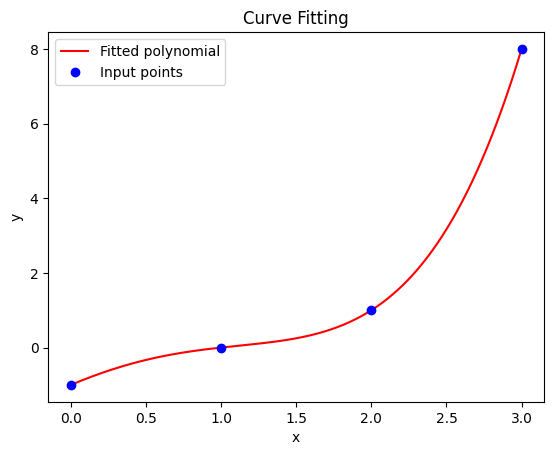

In [ ]:
new_poly = best_fit([(0, -1), (1, 0), (2, 1), (3,8)], 4)

#Question 2

In [ ]:
import math
from scipy.integrate import quad

In [ ]:
def q2(n):
  x_val = []
  for i in range(n):
    x_val.append(math.pi*(i/n))
  y_val = [math.sin(x)+math.cos(x) for x in x_val]
  x = x_val
  y = y_val
  m = n
  b = []
  for j in range(0, n+1):
      b.append(
          quad((lambda x: (x**j)*(np.sin(x) + np.cos(x))), 0, np.pi)[0])


  S = []
  for j in range(0, n+1):
      currRow = []
      for k in range(0, n+1):
          currRow.append(((np.pi)**(j+k+1))/(j+k+1))
      S.append(currRow)

  final_poly = Polynomial(list(np.linalg.solve(S, b)))
  a = 0
  b = math.pi

  x_plots = np.linspace(a, b, 1000)  # Generate points for plotting
  y1_plots = [final_poly[i] for i in x_plots]
  y2_plots = [math.sin(i)+math.cos(i) for i in x_plots]
  plt.plot(x_plots, y1_plots, color='r', label="Fitted polynomial")  # Plot the fitted polynomial
  plt.plot(x_plots, y2_plots, color='b', label="Actual curve")
  plt.title(f"Curve Fitting sin(x)+cos(x) for {n} points")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()
  return final_poly

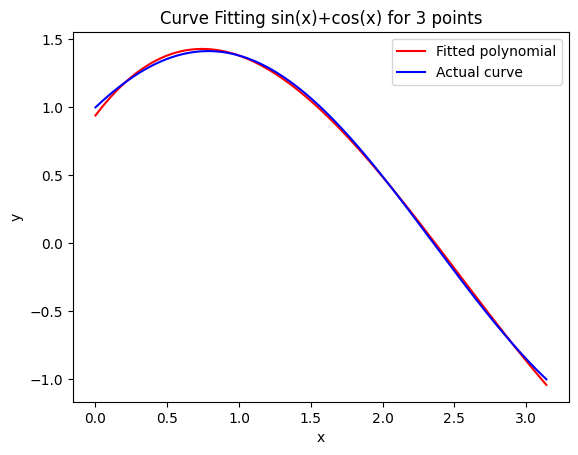

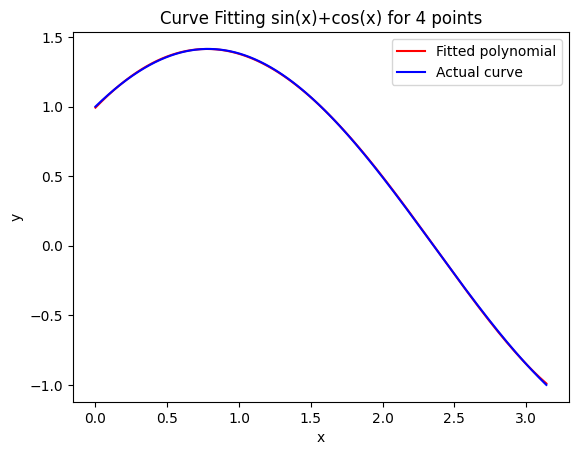

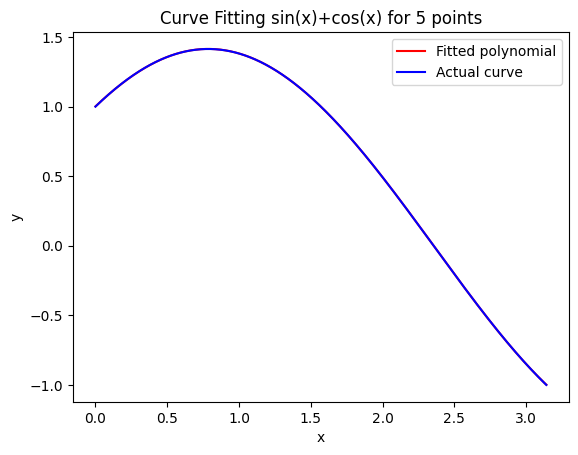

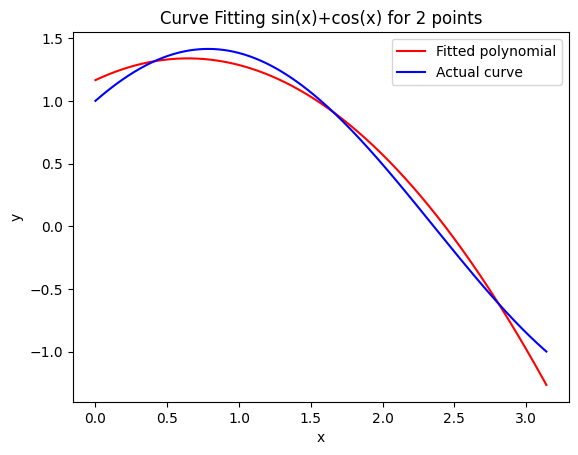

In [ ]:
test_q2 = q2(3)
test_q2 = q2(4)
test_q2 = q2(5)
test_q2 = q2(2)

#Question 3

In [ ]:
check_poly = Polynomial([1, 0, 1])
print(check_poly)
diff_check = check_poly.derivative()
print(diff_check)

The following is the polynomial
1 + 0x^1 + 1x^2 
The following is the polynomial
0 + 2x^1 


In [ ]:
def nth_legendre_poly(n):
  if (n==0):
    return Polynomial([1])
  base_poly = Polynomial([-1, 0, 1])
  #print(f"basepoly is {base_poly}")
  mul_poly = 1*base_poly
  for i in range(n-1):
    mul_poly *= base_poly
  #print(f"mulpoly is {mul_poly}")
  for i in range(n):
    mul_poly = mul_poly.derivative()
  #print(f"ddmppoly is {mul_poly}")
  divided_coeff = mul_poly.vec
  bada_number = (2**n)*math.factorial(n)
  #print(bada_number)
  #print(divided_coeff)
  new_coeff = []
  for ele in divided_coeff:
    new_coeff.append(ele/bada_number)
  #print(new_coeff)
  final_poly = Polynomial(new_coeff)
  return final_poly

In [ ]:
check_poly = nth_legendre_poly(0)
print(check_poly)
check_poly = nth_legendre_poly(1)
print(check_poly)
check_poly = nth_legendre_poly(2)
print(check_poly)

The following is the polynomial
1 
The following is the polynomial
0.0 + 1.0x^1 
The following is the polynomial
-0.5 + 0.0x^1 + 1.5x^2 


#Question 4

In [ ]:
from scipy.integrate import quad

In [ ]:
def integrand(x, j):
  return (math.e**x)*(x**j)

def get_poly_value(x, poly):
  return poly[x]

def q4(n):
  x_val = []
  for i in range(n):
    x_val.append(math.pi*(i/n))
  y_val = [math.sin(x)+math.cos(x) for x in x_val]
  x = x_val
  y = y_val
  m = n
  b = []

  for j in range(0, n + 1):
      currSum = quad(integrand, -1, 1, args=(j))
      b.append(currSum)

  S = []
  for j in range(0, n + 1):
      currRow = []
      xj = [0]*(j)
      xj.append(1)
      xj_poly = Polynomial(xj)
      #print(xj_poly)
      #print(j)
      for k in range(0, n + 1):
          kth_legendre = nth_legendre_poly(k)
          final_poly = kth_legendre*xj_poly
          currSum = final_poly.area(-1, 1)   #integral of pk and x**j
          #currSum = quad(get_poly_value, -1, 1, args=(final_poly))
          currRow.append(currSum)
      S.append(currRow)

  final_poly = Polynomial(list(np.linalg.solve(S, b)))
  a = -1
  b = 1
  print(final_poly[1])
  x_plots = np.linspace(a, b, 1000)  # Generate points for plotting
  y1_plots = [final_poly[i][0] for i in x_plots]
  #print(y1_plots)
  y2_plots = [math.e**(i) for i in x_plots]
  plt.plot(x_plots, y1_plots, color='g', label="Fitted polynomial")  # Plot the fitted polynomial
  plt.plot(x_plots, y2_plots, color='b', label="Actual curve")
  plt.title(f"Curve Fitting from {n} legendre poly")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()
  return final_poly

[2.71828182 7.85170053]


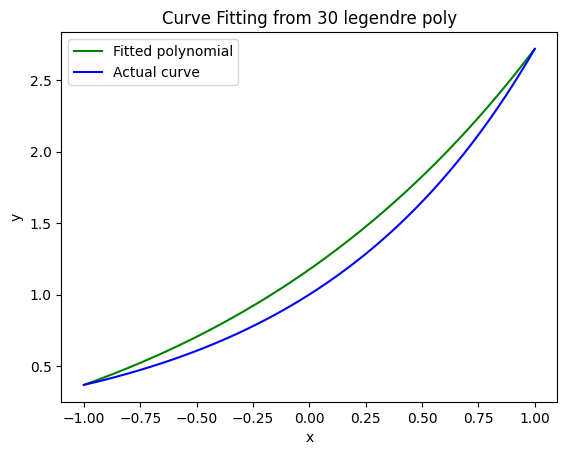

In [ ]:
q4(30)

#Question 5

In [ ]:
from numpy import *

In [ ]:
def nth_chebyshev(n):
  if n==0:
    return Polynomial([1])
  if n==1:
    return Polynomial([0,1])
  prev_prev_poly = Polynomial([1])
  prev_poly = Polynomial([0,1])
  curr_poly = prev_poly*Polynomial([0,2]) - prev_prev_poly
  #print(f"curr_poly is {curr_poly}\n")
  for i in range(n-2):
    curr_vec = curr_poly.vec.copy()
    prev_vec = prev_poly.vec.copy()
    prev_prev_vec = prev_prev_poly.vec.copy()

    # print(f"i is {i}")
    # print(curr_vec)
    # print(prev_vec)
    # print(prev_prev_vec)

    curr_poly = Polynomial(curr_vec)*Polynomial([0,2]) - prev_poly
    prev_vec = Polynomial(curr_vec)
    prev_prev_vec = Polynomial(prev_vec)

    # print(f"curr_poly is {curr_poly}\n")
    # print(f"prev_poly is {prev_poly}\n")
    # print(f"pp_poly is {prev_prev_poly}\n")

  return curr_poly


In [ ]:
check_poly = nth_chebyshev(4)
print(check_poly)
#check_poly = nth_chebyshev(4)
#print(check_poly)

The following is the polynomial
0 + -1x^1 + -6x^2 + 0x^3 + 8x^4 


#Question 6

In [ ]:
def weighted_cheby(x, i, j):
  p1 = nth_chebyshev(i)
  p2 = nth_chebyshev(j)
  return (1/(1-(x**2))**0.5)*(p1[x])*(p2[x])

In [ ]:
I = quad(weighted_cheby, -1, 1, args=(0,1))[0]
print(I)

0.0


In [ ]:
for i in range(5):
  print(abs(round(quad(weighted_cheby, -1, 1, args=(i,(i+1)%5))[0], 2)))

0.0
0.0
0.0
0.0
0.0


#Question 7

In [ ]:
def cosk(x, k):
  return (math.e**x)*(math.cos(k*x))
def sink(x, k):
  return (math.e**x)*(math.sin(k*x))
def e_power_x(x):
  return (math.e**x)

In [ ]:
def fourier_value(a0, ak, bk, x):
  ans = a0/2
  for i in range(len(ak)):
    ans += ak[i]*math.cos((i+1)*x)
    ans += bk[i]*math.sin((i+1)*x)
  return ans

In [ ]:
def fourier(n):
  ak = []  #ak[0] is a1
  bk = []  #same as a
  for i in range(n):
    ak.append((1/math.pi)*(quad(cosk, -math.pi, math.pi, args=(i+1))[0]))
    bk.append((1/math.pi)*(quad(sink, -math.pi, math.pi, args=(i+1))[0]))
  a0 = (1/math.pi)*(quad(e_power_x, -math.pi, math.pi)[0])
  print(a0)
  print(ak)
  print(bk)
  x_plots = np.linspace(-math.pi, math.pi, 1000)  # Generate points for plotting
  y1_plots = [fourier_value(a0, ak, bk, i) for i in x_plots]
  #print(y1_plots)
  y2_plots = [math.e**(i) for i in x_plots]
  plt.plot(x_plots, y1_plots, color='g', label="Fitted fourier")  # Plot the fitted polynomial
  plt.plot(x_plots, y2_plots, color='b', label="Actual curve")
  plt.title(f"Curve Fitting from {n} fourier")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.grid()
  plt.show()

3.6760779103749774
[7.352155820749955, -3.6760779103749774, 1.4704311641499912, -0.7352155820749959, 0.43247975416176176, -0.28277522387499693, 0.19870691407432362, -0.1470431164149997, 0.11311008954999849, -0.08966043683841039]
[0.0, 3.6760779103749766, -2.9408623282999806, 2.205646746224986, -1.7299190166470475, 1.4138761193749905, -1.1922414844459392, 1.0293018149049924, -0.9048807163999935, 0.8069439315457274]


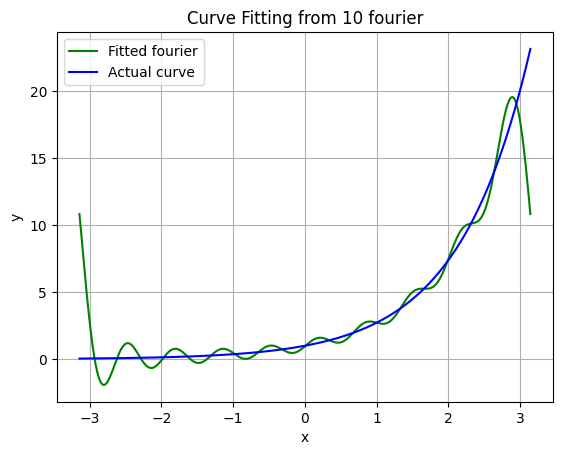

In [ ]:
fourier(10)

#Question 8